# **LOAN APPROVAL ANALYSIS**



# I. High Level Outline

* [**Problem Definition**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#problem-definition)

* [**Background Information**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#background-information)
*  [**Importance**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#importance)

* [**Key Stakeholders**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#key-stakeholders)

* [**Objective**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#objective)




---

# II. Data Section
* [**Dataset Description**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#dataset-description)
* [**Data Overview**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#data-overview)

# III. **Summary**
* [**Winning Model**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#b-steps-to-further-improve-model-performance)
* [**Steps to Further Improve Model Performance**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#b-steps-to-further-improve-model-performance)
* [**Business Insights for Managers**](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#c-business-insights-for-managers)
* [**Ethical Concerns Using This Dataset**
](https://github.com/AbelEsther/Loan-Approval-Analysis/edit/main/README.md#d-ethical-concerns-using-this-dataset)

# **Loan Approval Analysis**
**Importing packages**

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Import csv file from drive
path="/content/drive/MyDrive/Colab Notebooks/loan_approval.csv"

Mounted at /content/drive


In [4]:
# Load the uploaded CSV file into a DataFrame
df=pd.read_csv(path)

## A. EDA

### Descriptive Analysis
I will inspect the structure, types, and basic statistics to gain initial insights.


In [5]:
# Print out the number of observations for the origianl dataset
print("Number of Observations for full data:",df.shape[0])

Number of Observations for full data: 690


In [6]:
# Display the DataFrame's information
print("\nDataFrame Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   approved          690 non-null    int64  
 1   gender            690 non-null    int64  
 2   age               690 non-null    float64
 3   debt              690 non-null    float64
 4   married           690 non-null    int64  
 5   bank_customer     690 non-null    int64  
 6   ethnicity_white   690 non-null    int64  
 7   ethnicity_black   690 non-null    int64  
 8   ethnicity_latino  690 non-null    int64  
 9   ethnicity_asian   690 non-null    int64  
 10  ethnicity_other   690 non-null    int64  
 11  years_employed    690 non-null    float64
 12  prior_default     690 non-null    int64  
 13  employed          690 non-null    int64  
 14  credit_score      690 non-null    int64  
 15  drivers_license   690 non-null    int64  
 16  Income            690 non-null    int64  
dt

In [7]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

First few rows of the DataFrame:
    approved  gender    age   debt  married  bank_customer  ethnicity_white  \
0         1       1  30.83  0.000        1              1                1   
1         1       0  58.67  4.460        1              1                0   
2         1       0  24.50  0.500        1              1                0   
3         1       1  27.83  1.540        1              1                1   
4         1       1  20.17  5.625        1              1                1   

   ethnicity_black  ethnicity_latino  ethnicity_asian  ethnicity_other  \
0                0                 0                0                0   
1                1                 0                0                0   
2                1                 0                0                0   
3                0                 0                0                0   
4                0                 0                0                0   

   years_employed  prior_default  employed  credit_s

In [8]:
# Display summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          approved      gender         age        debt     married  \
count  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.444928    0.695652   31.514116    4.758725    0.760870   
std      0.497318    0.460464   11.860245    4.978163    0.426862   
min      0.000000    0.000000   13.750000    0.000000    0.000000   
25%      0.000000    0.000000   22.670000    1.000000    1.000000   
50%      0.000000    1.000000   28.460000    2.750000    1.000000   
75%      1.000000    1.000000   37.707500    7.207500    1.000000   
max      1.000000    1.000000   80.250000   28.000000    1.000000   

       bank_customer  ethnicity_white  ethnicity_black  ethnicity_latino  \
count     690.000000       690.000000        690.00000        690.000000   
mean        0.763768         0.591304          0.20000          0.082609   
std         0.425074         0.491949          0.40029          0.275490   
min         0.000000         0.000000          0.000

### Exploratory Analysis

**Correlation Metrix**
A correlation matrix to show the strength and direction of the linear relationships between variables in a dataset.

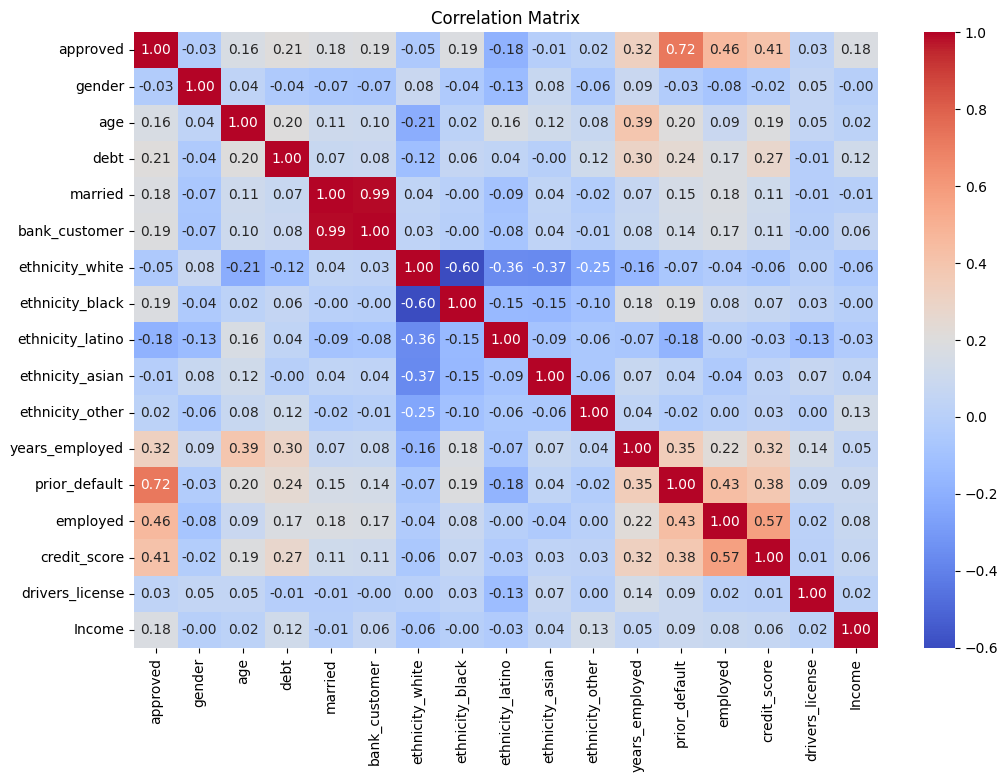

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### EDA Insights
Ploting the distribution of each feature to understand their spread and check for scaling issue

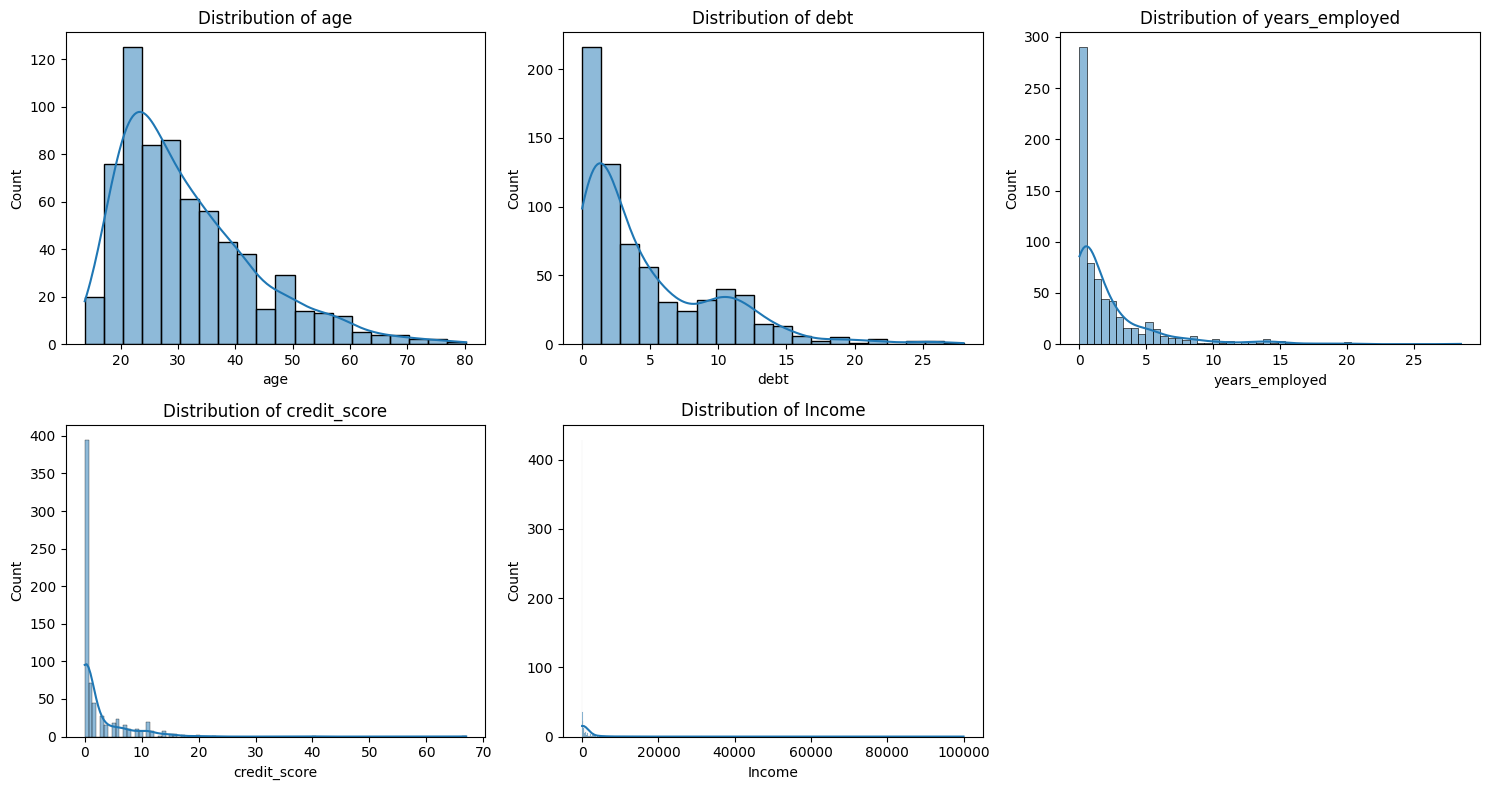

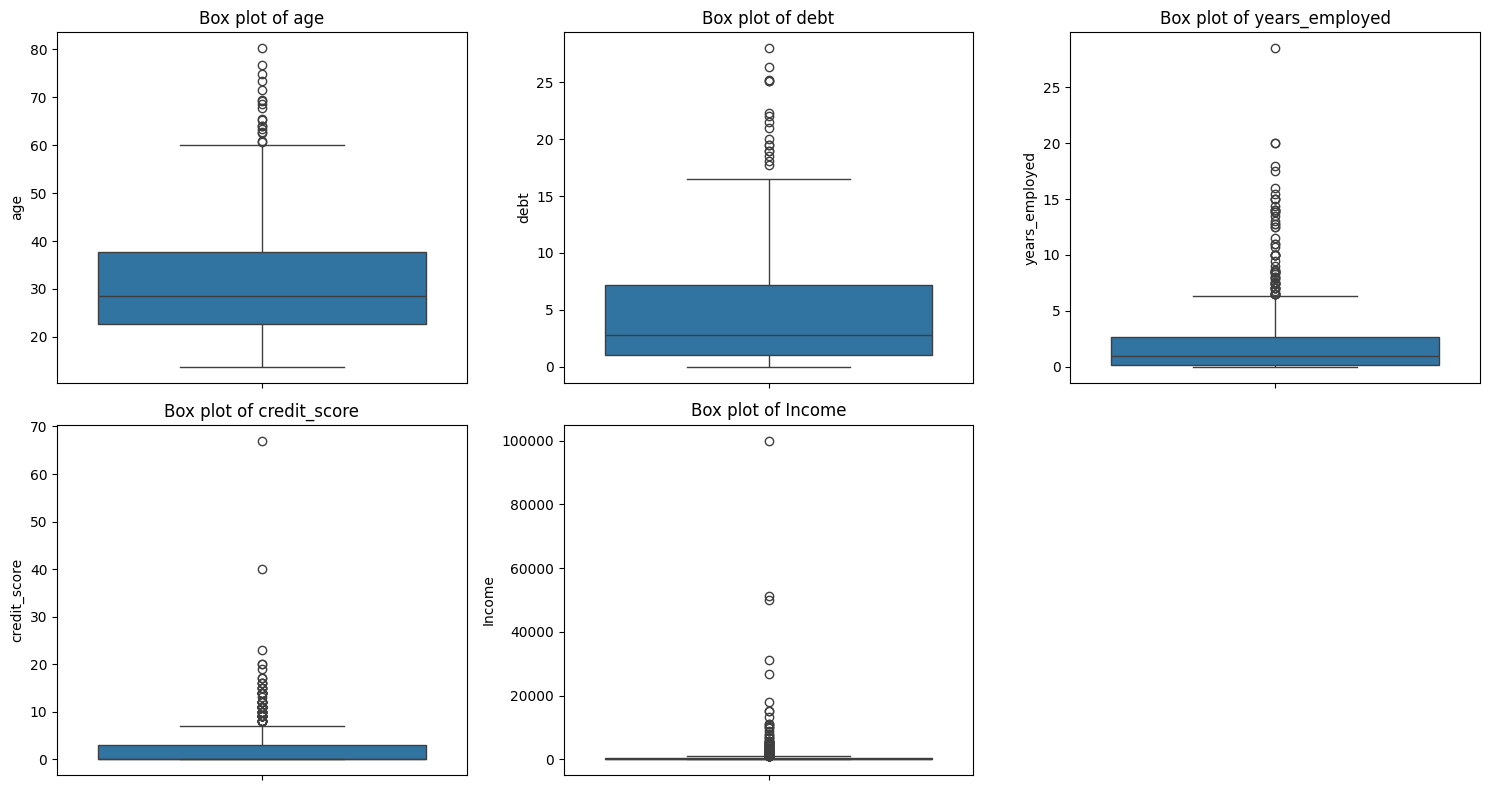

In [10]:
# Plot the distribution of key numerical features to understand their spread and check for scaling issues
numerical_columns = ['age', 'debt', 'years_employed', 'credit_score', 'Income']

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns) // 2 + 1, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Plot box plots to identify outliers visually
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns) // 2 + 1, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


The histograms reveal distinct patterns across key features in the dataset. **Income** and **Debt** distributions are highly skewed, with most values clustered at the lower end and a few high-value outliers, suggesting that only a minority of applicants have substantial income or debt levels. **Credit Score** shows variability but has notable peaks at lower values, indicating that a significant portion of applicants may have low creditworthiness. **Age** appears closer to a normal distribution, slightly right-skewed, with most applicants falling within a younger to middle-aged range. These patterns highlight the diversity in applicants' financial profiles, with skewed distributions that may impact model training and require consideration in feature scaling or transformation.

Visual inspection of **box plots** highlighted potential outliers, particularly in Income and debt, which may affect model performance if not addressed in further analysis.

### Checking the balance of the target variable

In this EDA, I will use interactive charts to provide insights into how certain factors relate to loan approval, helping us understand which attributes may be predictive in the model.

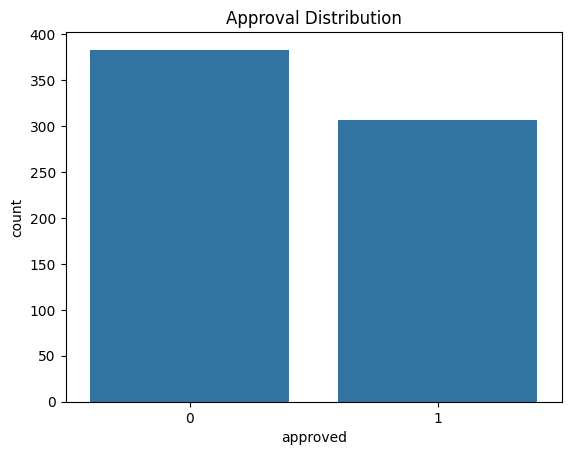

In [11]:
# Checking the balance of the target variable
sns.countplot(x='approved', data=df)
plt.title('Approval Distribution')
plt.show()

### Loan Approval Analysis for key features

In [12]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Initialize subplot with a 2x3 grid layout
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=[
    'Loan Approval by Income', 'Loan Approval by Debt', 'Loan Approval by Age',
    'Loan Approval by Years Employed', 'Loan Approval by Credit Score', 'Loan Approval by Marital Status'
])

# Income vs. Approved Status
fig.add_trace(go.Histogram(x=df['Income'], nbinsx=20, name='Income Approved',
                           marker_color='blue', opacity=0.75), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Income'][df['approved'] == 0], nbinsx=20, name='Income Not Approved',
                           marker_color='red', opacity=0.75), row=1, col=1)
fig.update_xaxes(title_text="Income", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

# Debt vs. Approved Status
fig.add_trace(go.Histogram(x=df['debt'], nbinsx=20, name='Debt Approved',
                           marker_color='blue', opacity=0.75), row=1, col=2)
fig.add_trace(go.Histogram(x=df['debt'][df['approved'] == 0], nbinsx=20, name='Debt Not Approved',
                           marker_color='red', opacity=0.75), row=1, col=2)
fig.update_xaxes(title_text="Debt", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

# Age vs. Approved Status
fig.add_trace(go.Histogram(x=df['age'], nbinsx=20, name='Age Approved',
                           marker_color='blue', opacity=0.75), row=1, col=3)
fig.add_trace(go.Histogram(x=df['age'][df['approved'] == 0], nbinsx=20, name='Age Not Approved',
                           marker_color='red', opacity=0.75), row=1, col=3)
fig.update_xaxes(title_text="Age", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=3)

# Years Employed vs. Approved Status
fig.add_trace(go.Histogram(x=df['years_employed'], nbinsx=20, name='Years Employed Approved',
                           marker_color='blue', opacity=0.75), row=2, col=1)
fig.add_trace(go.Histogram(x=df['years_employed'][df['approved'] == 0], nbinsx=20, name='Years Employed Not Approved',
                           marker_color='red', opacity=0.75), row=2, col=1)
fig.update_xaxes(title_text="Years Employed", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

# Credit Score vs. Approved Status
fig.add_trace(go.Histogram(x=df['credit_score'], nbinsx=20, name='Credit Score Approved',
                           marker_color='blue', opacity=0.75), row=2, col=2)
fig.add_trace(go.Histogram(x=df['credit_score'][df['approved'] == 0], nbinsx=20, name='Credit Score Not Approved',
                           marker_color='red', opacity=0.75), row=2, col=2)
fig.update_xaxes(title_text="Credit Score", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Marital Status vs. Approved Status
fig.add_trace(go.Histogram(x=df['married'], nbinsx=2, name='Married Approved',
                           marker_color='blue', opacity=0.75), row=2, col=3)
fig.add_trace(go.Histogram(x=df['married'][df['approved'] == 0], nbinsx=2, name='Married Not Approved',
                           marker_color='red', opacity=0.75), row=2, col=3)
fig.update_xaxes(title_text="Marital Status (1 = Married, 0 = Not Married)", row=2, col=3)
fig.update_yaxes(title_text="Count", row=2, col=3)

# Update overall layout
fig.update_layout(height=800, width=1200, title_text="Loan Approval Analysis by Key Features",
                  showlegend=False, template="plotly_white")

# Show the interactive plot with all subplots in a 2x3 grid
fig.show()

The graphs illustrate the distribution of loan approval status across various applicant characteristics. Higher **Income** and **Credit Scores** generally show a trend toward higher loan approval rates, likely due to perceived financial stability. Conversely, applicants with substantial **Debt** or shorter **Years Employed** tend to have lower approval rates, highlighting the importance of income reliability and debt load in loan decisions. **Age** also influences approvals, with middle-aged applicants showing slightly higher acceptance rates. Lastly, **Marital Status** reveals a slight preference for approvals among married applicants, possibly due to perceived household stability. These insights suggest key factors that might be predictive in loan approval modeling.

## B. Train/Test Split

I will split the dataset into training and testing sets. By splitting the data into training and testing sets, the model can be trained on one portion of the data and evaluated on another, helping to ensure that the model generalizes well to new data rather than just memorizing the training data. The use of random_state adds an element of consistency to the process, so that the same split is generated each time, which is particularly helpful in research or when sharing code. This approach is standard practice in machine learning workflows to prevent overfitting and provide a reliable estimate of model performance.

I divided the dataset into training (80%) and testing (20%) sets.The random_state=42 ensures that the split is consistent each time the code is run, which is useful for reproducibility.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/Test Split and Normalization

# Define features (X) and target (y)
X = df.drop(columns=['approved'])  # Exclude target variable
y = df['approved']  # Target variable

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features in the training and test sets
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Display the transformed training data to confirm scaling
X_train.head(), X_test.head()


(     gender       age      debt  married  bank_customer  ethnicity_white  \
 278       1 -0.581957  1.852077        0              0                0   
 110       1 -0.191330 -0.229966        1              1                1   
 82        1  0.715879 -0.854579        1              1                1   
 51        1 -0.461110 -0.750477        1              1                1   
 218       1  1.914995  1.045285        1              1                1   
 
      ethnicity_black  ethnicity_latino  ethnicity_asian  ethnicity_other  \
 278                0                 1                0                0   
 110                0                 0                0                0   
 82                 0                 0                0                0   
 51                 0                 0                0                0   
 218                0                 0                0                0   
 
      years_employed  prior_default  employed  credit_score  drivers_lic

# III. Classification Modeling

### **1. Logistic Model, KNN, SVM  Explanations and Applications**

- **Logistic Regression**: Logistic Regression can predict loan approval based on applicant characteristics, providing probability estimates for each application, which could help the bank assess borderline cases or prioritize applications with high approval probabilities.

- **K-Nearest Neighbors (KNN)**: KNN can classify loan applications by finding similar applicants in the dataset. This approach can help capture patterns in approval decisions based on similar applicants' profiles but may struggle with high-dimensional data.

- **Support Vector Machine (SVM)**: In loan approval analysis, SVM can robustly classify applicants even with complex boundaries in the feature space, especially useful if approval decisions depend on intricate patterns among features.

Each model offers unique strengths: Logistic Regression provides interpretable probability scores, KNN leverages similarity in applicant profiles, and SVM excels in separating complex data patterns, making them all valuable in this predictive analysis.

## **2.Details for Each Model**

### A. Hyperparameter Tuning to find optimal parameters

#### a. **Logistic Regression**
Logistic Regression Hyperparameter Tuning to find optimal parameters

Parameters: C=0.001, Solver=newton-cg, Accuracy Score=0.6413431613431614
Parameters: C=0.001, Solver=lbfgs, Accuracy Score=0.6413431613431614
Parameters: C=0.001, Solver=liblinear, Accuracy Score=0.7862407862407862
Parameters: C=0.01, Solver=newton-cg, Accuracy Score=0.7934643734643735
Parameters: C=0.01, Solver=lbfgs, Accuracy Score=0.7952825552825553
Parameters: C=0.01, Solver=liblinear, Accuracy Score=0.8134316134316133
Parameters: C=0.1, Solver=newton-cg, Accuracy Score=0.8659459459459459
Parameters: C=0.1, Solver=lbfgs, Accuracy Score=0.8659459459459459
Parameters: C=0.1, Solver=liblinear, Accuracy Score=0.8605077805077805
Parameters: C=1.0, Solver=newton-cg, Accuracy Score=0.8786076986076985
Parameters: C=1.0, Solver=lbfgs, Accuracy Score=0.8786240786240785
Parameters: C=1.0, Solver=liblinear, Accuracy Score=0.8750040950040949
Parameters: C=10.0, Solver=newton-cg, Accuracy Score=0.8822604422604423
Parameters: C=10.0, Solver=lbfgs, Accuracy Score=0.8822604422604423
Parameters: C=1

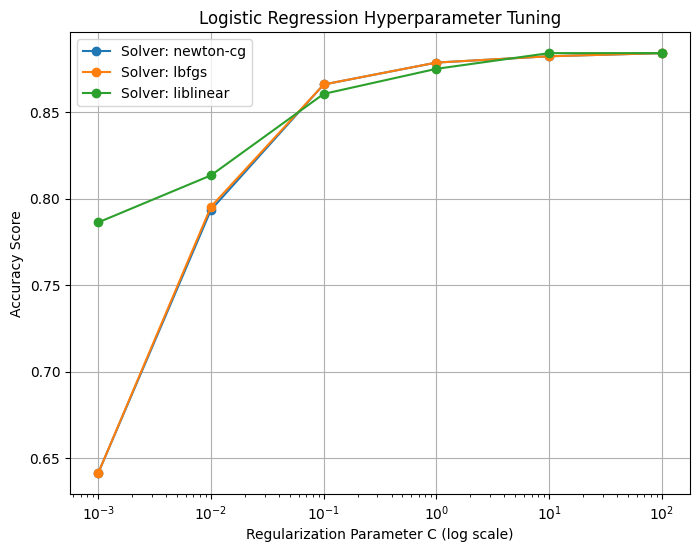

({'C': 10, 'solver': 'liblinear'}, 0.884078624078624)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Define parameter grid for Logistic Regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform Grid Search with cross-validation and accuracy as the scoring criterion
log_reg_cv = GridSearchCV(log_reg, log_reg_params, scoring='accuracy', cv=5)
log_reg_cv.fit(X_train, y_train)

# Extract results into a DataFrame
log_reg_results = pd.DataFrame(log_reg_cv.cv_results_)

# Print each parameter set and its corresponding score
for i, row in log_reg_results.iterrows():
    print(f"Parameters: C={row['param_C']}, Solver={row['param_solver']}, Accuracy Score={row['mean_test_score']}")

# Plot the results to visualize how different parameters affect accuracy
plt.figure(figsize=(8, 6))
for solver in log_reg_params['solver']:
    subset = log_reg_results[log_reg_results['param_solver'] == solver]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=f'Solver: {solver}')
plt.xscale('log')  # Log scale for C values for better visualization
plt.xlabel('Regularization Parameter C (log scale)')
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()

# Display the best parameters and the best score
best_log_reg_params = log_reg_cv.best_params_
best_log_reg_score = log_reg_cv.best_score_

best_log_reg_params, best_log_reg_score


#### **Logistic Regression Evaluation**

- **Best parameters for Logistic Regression:** {'C': 10, 'solver': 'liblinear'}
- **Best score for Logistic Regression:** 0.884078624078624

This tuning result, visualized in the plot, shows how different values of the regularization parameter C and solver options impact model accuracy. The best accuracy was achieved with C=10 and the liblinear solver, indicating these settings balance regularization and fitting for optimal performance on this dataset.

#### 	b. **K-Nearest Neighbors (KNN)**
Hyperparameter tuning for KNN using GridSearchCV with accuracy as the scoring criterion


Parameters: n_neighbors=3, Weights=uniform, Accuracy Score=0.8242915642915642
Parameters: n_neighbors=3, Weights=distance, Accuracy Score=0.8441932841932841
Parameters: n_neighbors=5, Weights=uniform, Accuracy Score=0.8260442260442261
Parameters: n_neighbors=5, Weights=distance, Accuracy Score=0.8405405405405405
Parameters: n_neighbors=7, Weights=uniform, Accuracy Score=0.8424078624078624
Parameters: n_neighbors=7, Weights=distance, Accuracy Score=0.8423914823914824
Parameters: n_neighbors=9, Weights=uniform, Accuracy Score=0.8351842751842753
Parameters: n_neighbors=9, Weights=distance, Accuracy Score=0.8406224406224407
Parameters: n_neighbors=11, Weights=uniform, Accuracy Score=0.8351842751842753
Parameters: n_neighbors=11, Weights=distance, Accuracy Score=0.837002457002457


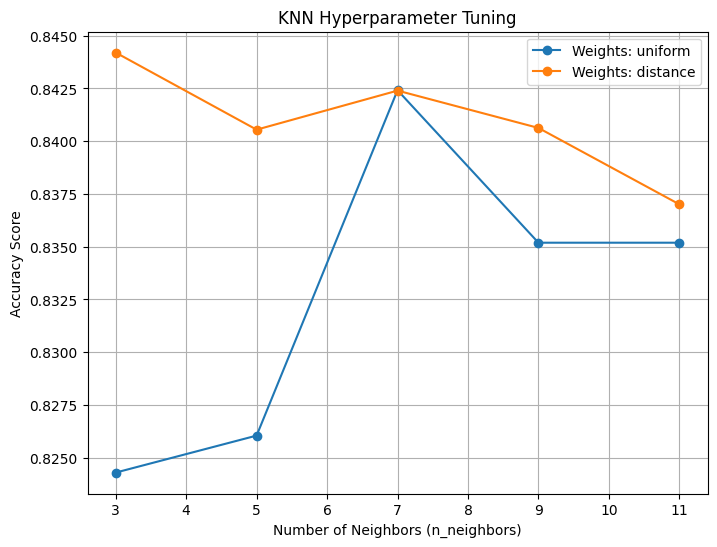

({'n_neighbors': 3, 'weights': 'distance'}, 0.8441932841932841)

In [15]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier # This line is crucial
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform Grid Search with cross-validation
knn_cv = GridSearchCV(knn, knn_params, scoring='accuracy', cv=5)
knn_cv.fit(X_train, y_train)

# Extract results into a DataFrame
knn_results = pd.DataFrame(knn_cv.cv_results_)

# Print each parameter set and its corresponding score
for i, row in knn_results.iterrows():
    print(f"Parameters: n_neighbors={row['param_n_neighbors']}, Weights={row['param_weights']}, Accuracy Score={row['mean_test_score']}")

# Plot the results to visualize how different parameters affect accuracy
plt.figure(figsize=(8, 6))
for weight in knn_params['weights']:
    subset = knn_results[knn_results['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'Weights: {weight}')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy Score')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()

# Display the best parameters and the best score
best_knn_params = knn_cv.best_params_
best_knn_score = knn_cv.best_score_

best_knn_params, best_knn_score

#### **K-Nearest Neighbors (KNN) Evaluation**
The hyperparameter tuning for the K-Nearest Neighbors (KNN) model produced the following optimal parameters:

- **Number of Neighbors (n_neighbors)**: 3
- **Weights**: distance
- **Best Accuracy Score:** 0.844
<br>This tuning result, visualized in the plot, shows how different values of n_neighbors and weights affect the accuracy score.
The highest accuracy was achieved with n_neighbors=3 and weights='distance', indicating that this configuration provides the best performance for our KNN model.

#### c. **Support Vector Machine (SVM)**
Hyperparameter tuning for SVM using GridSearchCV with accuracy as the scoring criterion


Parameters: C=0.001, Kernel=rbf, Accuracy Score=0.5706633906633907
Parameters: C=0.001, Kernel=sigmoid, Accuracy Score=0.5706633906633907
Parameters: C=0.01, Kernel=rbf, Accuracy Score=0.5706633906633907
Parameters: C=0.01, Kernel=sigmoid, Accuracy Score=0.5742833742833742
Parameters: C=0.1, Kernel=rbf, Accuracy Score=0.8442588042588042
Parameters: C=0.1, Kernel=sigmoid, Accuracy Score=0.8532841932841932
Parameters: C=1.0, Kernel=rbf, Accuracy Score=0.855053235053235
Parameters: C=1.0, Kernel=sigmoid, Accuracy Score=0.7862407862407862
Parameters: C=10.0, Kernel=rbf, Accuracy Score=0.8568714168714168
Parameters: C=10.0, Kernel=sigmoid, Accuracy Score=0.7862244062244061
Parameters: C=100.0, Kernel=rbf, Accuracy Score=0.8423914823914824
Parameters: C=100.0, Kernel=sigmoid, Accuracy Score=0.7662899262899263


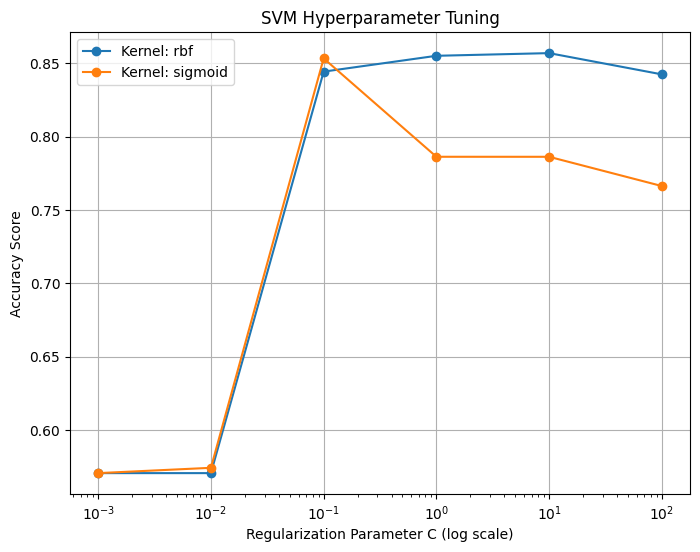

({'C': 10, 'kernel': 'rbf'}, 0.8568714168714168)

In [16]:
from sklearn.svm import SVC
# Define the parameter grid for SVM
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'sigmoid']}

# Initialize the SVM model
svm = SVC()

# Perform Grid Search with cross-validation
svm_cv = GridSearchCV(svm, svm_params, scoring='accuracy', cv=5)
svm_cv.fit(X_train, y_train)

# Extract results into a DataFrame
svm_results = pd.DataFrame(svm_cv.cv_results_)

# Print each parameter set and its corresponding score
for i, row in svm_results.iterrows():
    print(f"Parameters: C={row['param_C']}, Kernel={row['param_kernel']}, Accuracy Score={row['mean_test_score']}")

# Plot the results to visualize how different parameters affect accuracy
plt.figure(figsize=(8, 6))
for kernel in svm_params['kernel']:
    subset = svm_results[svm_results['param_kernel'] == kernel]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=f'Kernel: {kernel}')
plt.xscale('log')  # Log scale for C values for better visualization
plt.xlabel('Regularization Parameter C (log scale)')
plt.ylabel('Accuracy Score')
plt.title('SVM Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()

# Display the best parameters and the best score
best_svm_params = svm_cv.best_params_
best_svm_score = svm_cv.best_score_

best_svm_params, best_svm_score


#### **Support Vector Machine (SVM) Evaluation**
The hyperparameter tuning for the Support Vector Machine (SVM) model yielded the following optimal parameters:

- **C**: 10
- **Kernel:** rbf
- **Best Accuracy Score:** 0.857
<br> The plot illustrates how accuracy varies across different values of C and kernel types (rbf and sigmoid).
The highest accuracy was achieved with C=10 and the rbf kernel, indicating this parameter set provides the best performance for our SVM model on the loan approval dataset.

### **B.Evaluating the best model for each type**

- Show Confusion Matrix
- Show Classification Report
- Draw ROC Curve and AUC
- Conduct K-Fold cross-validation

#### **a. Logistic Regression Evaluation**

Evaluating Logistic Regression Model
Logistic Regression - Confusion Matrix:
[[55 13]
 [11 59]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        68
           1       0.82      0.84      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



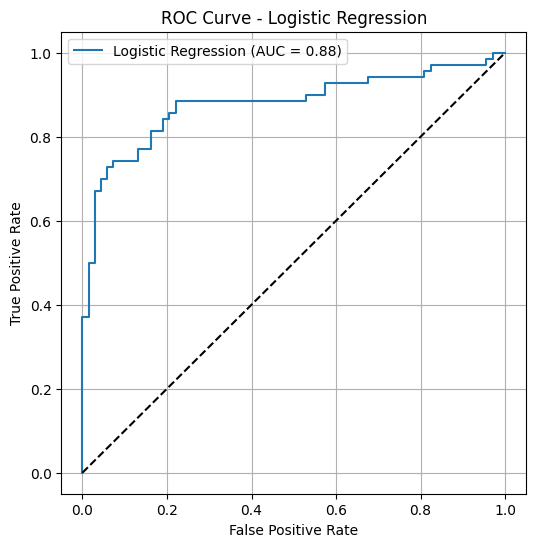

Logistic Regression - Cross-Validation Accuracy Scores: [0.88288288 0.87387387 0.92727273 0.85454545 0.88181818]
Logistic Regression - Mean CV Accuracy: 0.88


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score # Import cross_val_score from the correct module

print("Evaluating Logistic Regression Model")
best_log_reg = LogisticRegression(C=10, solver='liblinear')


# Fit the model and make predictions
best_log_reg.fit(X_train, y_train)
y_pred_log_reg = best_log_reg.predict(X_test)

# Confusion Matrix
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Classification Report
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# ROC Curve and AUC for Logistic Regression
y_proba_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(6, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# K-Fold Cross-Validation for Logistic Regression
cv_scores_log_reg = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression - Cross-Validation Accuracy Scores: {cv_scores_log_reg}")
print(f"Logistic Regression - Mean CV Accuracy: {cv_scores_log_reg.mean():.2f}")


 **Logistic Regression**:
   - **Confusion Matrix**: Shows a balanced classification performance, with 55 true negatives and 59 true positives.
   - **Classification Report**: Accuracy of 83%, with balanced precision and recall scores (0.83).
   - **ROC Curve and AUC**: Visualized above with an AUC score indicating strong performance.
   - **Cross-Validation Accuracy**: Mean accuracy of 88%, showing consistent performance across folds.


#### **b. K-Nearest Neighbors Evaluation**


Evaluating K-Nearest Neighbors Model
K-Nearest Neighbors - Confusion Matrix:
[[57 11]
 [21 49]]

K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        68
           1       0.82      0.70      0.75        70

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138



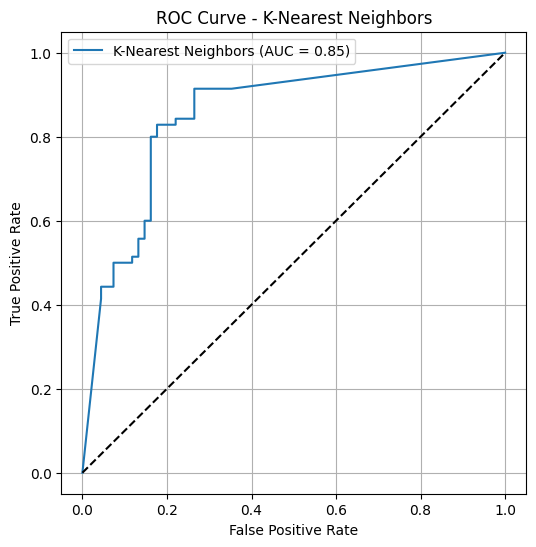

K-Nearest Neighbors - Cross-Validation Accuracy Scores: [0.84684685 0.84684685 0.83636364 0.85454545 0.83636364]
K-Nearest Neighbors - Mean CV Accuracy: 0.84


In [18]:

print("\nEvaluating K-Nearest Neighbors Model")
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Fit the model and make predictions
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Confusion Matrix
print("K-Nearest Neighbors - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Classification Report
print("\nK-Nearest Neighbors - Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC Curve and AUC for K-Nearest Neighbors
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 6))
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend()
plt.grid()
plt.show()

# K-Fold Cross-Validation for K-Nearest Neighbors
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"K-Nearest Neighbors - Cross-Validation Accuracy Scores: {cv_scores_knn}")
print(f"K-Nearest Neighbors - Mean CV Accuracy: {cv_scores_knn.mean():.2f}")


 **K-Nearest Neighbors (KNN)**:
   - **Confusion Matrix**: Good performance with 57 true negatives and 49 true positives, though a slight increase in false positives.
   - **Classification Report**: Overall accuracy of 77%, slightly lower than Logistic Regression.
   - **ROC Curve and AUC**: Visualized with a moderate AUC score.
   - **Cross-Validation Accuracy**: Mean accuracy of 84%, with stable results across folds.



#### **c. Support Vector Machine Evaluation**


Evaluating Support Vector Machine Model
Support Vector Machine - Confusion Matrix:
[[58 10]
 [15 55]]

Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        68
           1       0.85      0.79      0.81        70

    accuracy                           0.82       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.82      0.82      0.82       138



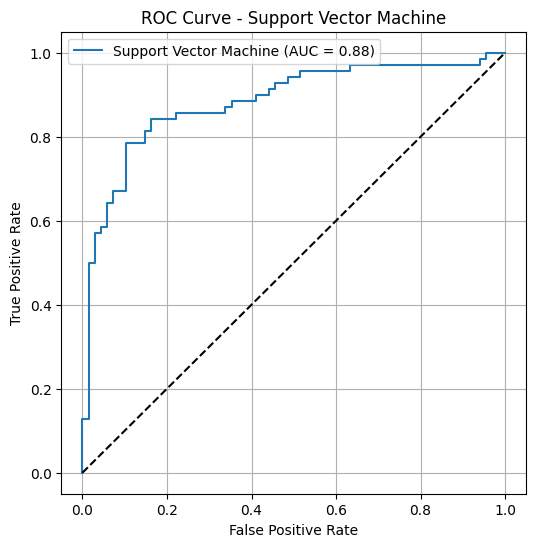

Support Vector Machine - Cross-Validation Accuracy Scores: [0.88288288 0.83783784 0.88181818 0.81818182 0.86363636]
Support Vector Machine - Mean CV Accuracy: 0.86


In [19]:
print("\nEvaluating Support Vector Machine Model")
best_svm = SVC(C=10, kernel='rbf', probability=True)

# Fit the model and make predictions
best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)

# Confusion Matrix
print("Support Vector Machine - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Classification Report
print("\nSupport Vector Machine - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC Curve and AUC for Support Vector Machine
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend()
plt.grid()
plt.show()

# K-Fold Cross-Validation for Support Vector Machine
cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy')
print(f"Support Vector Machine - Cross-Validation Accuracy Scores: {cv_scores_svm}")
print(f"Support Vector Machine - Mean CV Accuracy: {cv_scores_svm.mean():.2f}")


**Support Vector Machine (SVM)**:
   - **Confusion Matrix**: Good performance with 58 true negatives and 55 true positives.
   - **Classification Report**: Overall accuracy of 82%, with balanced precision and recall.
   - **ROC Curve and AUC**: Strong AUC score, indicating good discriminative power.
   - **Cross-Validation Accuracy**: Mean accuracy of 86%, consistent across folds.


## **Summary of Model Evaluation Results**
Overall, the **Logistic Regression model** achieves the highest average **cross-validation accuracy (88%)**, making it the most consistent performer in this dataset.